<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>

<hr style="height:2px;border:none"/>
<p align='center'> Alfredo Silva Celpa   201373511-8 </p>
<p align='center'> Margarita Bugueño Pérez   201373510-K </p>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).



In [49]:
def softmax_pre(x): #lo mismo
    salida=[] 
    suma=0.0
    for elemento in range(len(x)):
        aux=np.minimum(x[elemento],epsilon_gigantes)
        suma+=np.exp(aux)
    for elemento in range(len(x)):
        aux=np.minimum(x[elemento],epsilon_gigantes)
        temp=np.exp(aux)/suma
        salida.append(temp)
    return salida

In [53]:
a=[534.0,746.0,425.0]
b=np.max(a)
e=np.exp(a-b)
e/np.sum(e)

array([  8.50295414e-093,   1.00000000e+000,   3.90365393e-140])

In [54]:
softmax_pre(a)

[2.1705220113036397e-29, 1.0, 9.9647330101036719e-77]

In [55]:
import numpy as np

epsilon=1e-15
epsilon_gigantes=600
x_muy_grande=600
#constante para aproximar RELU
K=0.5
def sigmoidal(x):
    if (x>0):
        x = np.maximum(epsilon,x)
        return 1/(1+ np.exp(-x))
    elif(x<0):
        x = np.maximum(-600,x)
        return 1/(1+ np.exp(-x))
    else:
        return 1/(1+ np.exp(-(epsilon)))

def d_sigmoidal(x):
    return sigmoidal(x)*(1-sigmoidal(x))

def relu(x):#probar sin los trukillos
    #return np.maximum(0,x)
    x_aux=np.minimum(x,x_muy_grande)
    return (1/(2*K))*np.log(1+np.exp(2*K*x_aux))

def d_relu(x):#probar sin los trikullos
    x_aux=np.minimum(x,x_muy_grande)
    return np.exp(2*K*x_aux)/(np.exp(2*K*x_aux)+1)
    
    
#donde x es un vector
def softmax(x): #lo mismo
    b=np.max(x)
    e=np.exp(x-b)
    return e/np.sum(e)
    """
    salida=[] 
    suma=0.0
    for elemento in range(len(x)):
        aux=np.minimum(x[elemento],epsilon_gigantes)
        suma+=np.exp(aux)
    for elemento in range(len(x)):
        aux=np.minimum(x[elemento],epsilon_gigantes)
        temp=np.exp(aux)/suma
        salida.append(temp)
    return salida
    """


def d_softmax(x):
    return softmax(x)*(np.subtract(1,softmax(x)))

def error_mse(ytrue, ypred):
    # no se si debamos imlementarlo como 1/2*(ytrue-ypred)**2
    return (0.5)*((np.subtract(ytrue,ypred))**2)

def d_error_mse(ytrue, ypred):
    # si es asi, entonces se omitiría el 2 aquí
    return (np.subtract(ytrue,ypred))

#ypred, ytrue componentes
def error_CE(ytrue,ypred):
    #return ((ytrue*ypred)+(1-ytrue)*(1-ypred))
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon)
        #resta = np.maximum(1-ypred[i],epsilon) 
        temp=-(ytrue[i]*np.log(aux))#-(1-ytrue[i])*(np.log(resta)) PONER EL NEGATIVO
        vector_retorno.append(temp)
    return vector_retorno

def d_error_CE(ytrue,ypred):
    #return (np.subtract(ytrue,ypred))/(ypred*(np.subtract(1,ypred)))
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon)
        temp = -ytrue[i]/aux #PONER EL NEGATIVO
        #tmp=np.minimum(temp,epsilon_gigantes) #aqui le pongo el techo epsilon/5 funca piola
        vector_retorno.append(temp)
    return vector_retorno


#definir el modelo y su arquitectura
#total capas= capas ocultas + capa de salida
def size_layers(total_capas,input_size,n_capa_o1, n_capa_o2, n_capa_out):
    sizes=np.arange(total_capas+1)
    sizes[0]=input_size
    sizes[1]=n_capa_o1
    sizes[2]=n_capa_o2    
    sizes[3]=n_capa_out
    return sizes

def iniciar_estructuras(total_capas,tamanios_arquit):
    #vector sallida de cada capa, vector derivada de sallida respecto a w, vector error en la salida de cada capa
    salida_l=[]
    da_salida_l=[]
    e_salida_l=[]
    for i in np.arange(total_capas+1):        
        if i<total_capas:
            salida_l.append(np.zeros(tamanios_arquit[i+1]))
        else: 
            salida_l.append(np.zeros(tamanios_arquit[0]))
            
    da_salida_l=salida_l.copy()
    e_salida_l=salida_l.copy()    
    #matrices de pesos originales, matrices errores de pesos
    #matrices de peso inicializadas como 1
    m_pesos=[]
    for i in np.arange(total_capas):
        m_pesos.append(np.random.uniform(-0.1,0.1,([tamanios_arquit[i],tamanios_arquit[i+1]])))
    #matrices de errores en los pesos inicializadas como 0
    e_m_pesos=[]
    for i in np.arange(total_capas):
        e_m_pesos.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))  
      
    return salida_l, da_salida_l, e_salida_l, m_pesos, e_m_pesos    

def one_hot(posicion):
    array=np.zeros(3)
    array[posicion]=1
    return array


In [56]:
def vector2hot(vector):
    array=np.zeros(len(vector))
    posicion=np.argmax(vector)
    array[posicion]=1.0
    return array

In [57]:
def forwarding(total_capas, vector_x, salida_l, da_salida_l,m_pesos, vector_arquit, f_activ):
    vector=vector_x.copy() #se modifica en cada capa
    #print ("vector x es",vector )
    salida_l[-1]=vector.copy()
    ##################333333######DERIVADAAAA
    da_salida_l[-1]=vector.copy()
    ##################### DERIVADA
    for capa in range(total_capas-1):
        salida_capa=[]
        d_salida_capa=[]
        #print ("EL PRIMER VECTOR", vector)

        for neurona in range(vector_arquit[capa+1]):
            #pesos como vector columna de m_pesos
            w=(m_pesos[capa].T[neurona]).copy() #vector pesos hacia neurona desde las xs inputs (vector dimesion entrada a capa)
            temp= np.dot(vector,w)
            if f_activ=="sigmoid":
                temp1=sigmoidal(temp)
                temp2=d_sigmoidal(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
            else:                 
                temp1=relu(temp)
                temp2=d_relu(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
        salida_l[capa]=salida_capa.copy()
        da_salida_l[capa]=d_salida_capa.copy()
        vector=salida_capa.copy()
    salida_last_t=[]
    d_salida_last=[] 
    #EN SOFTMAX
    for neurona in range(vector_arquit[-1]): #0,1,2               
        #pesos como vector columna de m_pesos
        w=(m_pesos[-1].T[neurona]).copy() #vector pesos entre ult. capa oculta y la capa out (dimesion largo de capa anterior)
        temp= np.dot(vector,w) #elemento i-esimo entrada a softmax (de la salida de la capa)
        salida_last_t.append(temp) #vector de w*a    
    salida_last=softmax(salida_last_t)
    d_salida_last=d_softmax(salida_last_t)
    salida_l[-2]=salida_last.copy()
    da_salida_l[-2]=d_salida_last.copy()
    vector=salida_last.copy()
    return vector

In [58]:
def backwarding(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos):
    #print ("LAA CAPAAAAAAAA NUMERROOOOOOO LAST del back")

    if tipo_error=="mse":
        error_EA=d_error_mse(vector_y,salida_l[-2])
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])  
    #print ("\nBAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCKKKKKKKKKKKKKKKKKK\n")
    #print ("VECTOR EA LAST", error_EA)
    
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA[neurona_final]*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])
        #####################AQUI ESTAN LOS dE/dW
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()
        #correccion vector de pesos-matriz final correspondiente a la neurona
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        #print ("castigo pesos en \n", tasa*error_EW_n)
        #print ("el peso que voy a modificar es",pesos_auxiliar[neurona_final])
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()-(tasa*error_EW_n)
        #print ("el peso termina siendo",pesos_auxiliar[neurona_final])

        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()
    #print ("--------------------------------------------")
    #print ("M PESOS FINAL LISTO", m_pesos[total_capas-1])
    e_salida_l[total_capas-1]=error_EA.copy() #es el triangulo (Delta mayus.)        
    #backwarding de capas ocultas y capa input
    #corrección de pesos que debiese ser por batch         
    for capa in np.arange(total_capas-2,-1,-1): #se mueve en capa 1 y 0
        #print ("\n\nLAA CAPAAAAAAAA NUMERROOOOOOO", capa)
        #print ("e_salida siguiente capa",e_salida_l[capa+1])
        error_EA_s=np.sum(e_salida_l[capa+1]) #suma el vector EA calculado en la capa 2 (igual para todos)
        #print ("VECTOR EA INTERMEDIO", error_EA_s)
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() #se hace (16x32 la matriz)
        for neurona in range(vector_arquit[capa+1]):
            #print ("NEURONA", neurona)
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            #corregir pesos
            #print ("utilizo esto: \n")
            #print ("error_EA_s", error_EA_s)
            #print ("da_salida_l[capa][neurona]", da_salida_l[capa][neurona])
            #print ("salida_l[capa-1]", salida_l[capa-1])
            #pesos_auxiliar2=m_pesos[apa].T #se hace (16x32 la matriz)

            #print ("NEURONA", neurona)
            #print ("CAPA", capa)
            arreglo=(pesos_auxiliar2[neurona]-(tasa*error_EW_s)).copy() #(vector de 32)
            #print ("entonces castigo pesos en \n", tasa*error_EW_s)
            #print ("el peso que voy a modificar es",pesos_auxiliar2[neurona])
            pesos_auxiliar2[neurona]=arreglo.copy()  #se hace
            #print ("entonces queda en ", pesos_auxiliar2[neurona])
            #print ("entonces pesos auxiliar",pesos_auxiliar2[neurona])
            #print ("entonces pesos aux ",pesos_auxiliar2)
            #print ("pesos ANTES!!! ",m_pesos[capa])
            m_pesos[capa]=(pesos_auxiliar2.T).copy()                
            #print ("pesos AHORA!!! ",m_pesos[capa])
            #print ("pesos debiesen ser ahora", pesos_auxiliar2.T)
            #print ("pesos ahora",m_pesos[capa])                
            #print ("M PESOS EN CAPA", capa, "ES ", m_pesos[capa], "Pero DEBIESE SER", np.array(auxiliar2).T)
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

In [59]:
def shuffling(X_train,y_onehot):
    concatenados = []
    y_onehot_shuffled=[]
    X_train_shuffled=[]
    #np.random.shuffle(concatenados)
    for i in range(X_train.shape[0]):
        concatenados.append((X_train[i], y_onehot[i]))
    np.random.shuffle(concatenados)
    for i in range(len(concatenados)):
        X_train_shu,y_onehot_shu = concatenados[i]
        y_onehot_shuffled.append(y_onehot_shu)
        X_train_shuffled.append(X_train_shu)
    return X_train_shuffled,y_onehot_shuffled

In [60]:
class NN_2ocultas:
    def __init__(self, total_capas, tamanios_arquit):
        self.n_capa_in=tamanios_arquit[0]
        self.n_capa_1=tamanios_arquit[1]
        self.n_capa_2=tamanios_arquit[2]
        self.n_capa_out=tamanios_arquit[3]
        self.total_capas=total_capas
        self.salidas_l, self.da_salida_l, self.e_salida_l, self.m_pesos, self.e_m_pesos=iniciar_estructuras(total_capas,tamanios_arquit)

    def training(self, Xtrain, Ytrain, epoch, error, f_activ, tasa, tipo_back, reinit):
        #X_aux = Xtrain.copy()
        #select = numpy.random.choice(Xtrain, size=epoch, replace=False)
        #for xs in select:
        t=size_layers(self.total_capas,self.n_capa_in,self.n_capa_1, self.n_capa_2, self.n_capa_out)
        y_pred=forwarding(self.total_capas, Xtrain, self.salidas_l, self.da_salida_l,self.m_pesos, t, f_activ)

        if(error=="mse"):
            v_e = error_mse(y_pred, Ytrain)
        else:
            print("ypred",y_pred)
            print("ytrain",Ytrain)
            v_e = error_CE(y_pred, Ytrain)
            #print ("ERRORES CE VECOR", v_e)
            E = np.sum(v_e)#/len(v_e)
            vector_hot=vector2hot(y_pred)
            acc = np.dot(vector_hot,Ytrain)
        if tipo_back=="grad":
            self.m_pesos,self.e_m_pesos = backwarding(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                      self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                      self.m_pesos, t,self.e_m_pesos)
        else:
            if reinit==1:
                self.m_pesos,self.e_m_pesos = backwarding_momentum_reinit(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                      self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                      self.m_pesos, t,self.e_m_pesos)
            else:
                self.m_pesos,self.e_m_pesos = backwarding_momentum(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                      self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                      self.m_pesos, t,self.e_m_pesos)
            
        return E,acc
        #for x in Xtrain:
        #  Forward pass (xi, yi );
        #  Medir error E = E(xi, yi );
        #ojo! backwarding-SGD por batch (este caso es batch tamaño 1)
        #  Backward pass E;
    
    def entrenamiento(self,Xtrain,Ytrain, f_activ, tasa, tipo_back, reinit):
        errores=[]
        #pasada por epoch
        acc_epoch=[]
        for i in range(100):
            X_t,Y_t = shuffling(Xtrain,Ytrain)
            print("Epoch: ",i)
            #pasada por batch
            acc_batch=[]
            err_batch=[]
            for j in range(len(X_t)):
                #print("Batch: ",j)
                print ("EJEMPLO : ", X_t[j],Y_t[j])
                error,acc=self.training(X_t[j],Y_t[j],1,"ce", f_activ, tasa, tipo_back, reinit) #lo definimos ce porque mse no aprende (problema mal planteado)
                acc_batch.append(acc)
                err_batch.append(error)
                #print("Loss del batch: ",error)
                #print("Accuracy del batch: ",acc)
            acc_epoch.append(acc_batch)
            errores.append(err_batch)
        return errores,acc_epoch
    
        


> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).



In [61]:
def prediccion(redN,df_x,df_y,vector_arquit):
    vector_clase=[]
    for ejemplo in range(df_x.shape[0]):
        vector_x=df_x[ejemplo]
        temp_retorno=forwarding(redN.total_capas, vector_x, redN.salidas_l, redN.da_salida_l,redN.m_pesos, vector_arquit)
        vector_clase.append(temp_retorno)
    return vector_clase

def clase_vector(array_vector):
    to_return=[]
    for arreglo in array_vector:
        aux=np.argmax(a)+1
        to_return.append(aux)
    return to_return
        

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

## ARREGLAR RELU


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)

In [63]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo=NN_2ocultas(3, arquitectura)
print ("MPESOS ORIGINAL",modelo.m_pesos)
print (X_train.shape[0])
errores,accs = modelo.entrenamiento(X_train,y_onehot, "sigmoid", 0.15, "grad",0) 
#con reinicio 1, 0 sin reinicio de momentum por epoch 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

MPESOS ORIGINAL [array([[-0.00514113, -0.02462769, -0.0960984 , -0.05279693, -0.01469235,
         0.0389081 , -0.01617995, -0.01457486,  0.04193429, -0.04358568,
         0.03485313,  0.03881521,  0.02751241, -0.09836266,  0.07382055,
        -0.08940544, -0.05559416, -0.07801535,  0.0733439 ,  0.05272103,
        -0.08237265, -0.06277262,  0.04510136,  0.03685849, -0.02507037,
        -0.01950371, -0.022452  ,  0.00699526, -0.08296906,  0.02958516,
         0.00319228, -0.00202764],
       [-0.03779429, -0.04313773,  0.03006809, -0.0775159 , -0.03167175,
        -0.05710156,  0.082384  , -0.04370693, -0.03320873,  0.02675114,
         0.05610221, -0.02171924,  0.05379552, -0.02218816,  0.09544462,
         0.05305127,  0.03993994,  0.07423754, -0.02787029, -0.067589  ,
         0.07929664,  0.04141308, -0.02599824, -0.04802634, -0.0202679 ,
         0.09801719,  0.09168237,  0.08214018, -0.05387508, -0.00235949,
         0.01088091, -0.02878665],
       [-0.06584328, -0.06965518,  0.

EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.0259333   0.46358131  0.51048539]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.00453148  0.4499108   0.54555772]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.03199646  0.61692171  0.35108183]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05577006  0.60178861  0.34244133]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.01976414  0.74043729  0.23979858]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.01205098  0.84173425  0.14621477]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.00606032  0.42329869  0.57064099]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.28034

EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.70969992  0.21161973  0.07868035]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.83016067  0.12374838  0.04609095]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.44101666  0.53462404  0.0243593 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.75109658  0.23805543  0.01084799]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.67934639  0.21530508  0.10534853]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.37815705  0.12009283  0.50175012]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.1755428   0.05563453  0.76882267]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652

ypred [ 0.31303328  0.57120556  0.11576116]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.70275537  0.24704607  0.05019855]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.48933542  0.171836    0.33882858]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.21164048  0.07439785  0.71396167]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.12408498  0.04354381  0.83237121]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.53690544  0.02302148  0.44007308]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.44096354  0.19748262  0.36155384]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.20495984  

EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.54809828  0.11520853  0.33669319]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.23710368  0.04983831  0.71305801]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.13910648  0.02923963  0.83165388]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.09908914  0.02093972  0.87997115]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.48387145  0.0117987   0.50432985]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.43404443  0.11358042  0.45237516]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.19494798  0.05101375  0.75403827]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333

ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.19057966  0.68341876  0.12600158]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.62159752  0.31949471  0.05890777]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.26835728  0.70621259  0.02543013]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.21671858  0.5703046   0.21297682]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.09872741  0.25981208  0.64146051]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.48790355  0.14762321  0.36447324]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.2446634   0.57256832  0.18276828]
ytrain [ 1.  0.  0.]

ypred [ 0.51992888  0.46684941  0.01322171]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.46094541  0.41388755  0.12516704]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.24305061  0.21823761  0.53871178]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.11015076  0.64570458  0.24414467]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.04888296  0.28652083  0.66459621]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.02123957  0.68993743  0.288823  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.18521626  0.57434876  0.24043497]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.61634577  

EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.16794213  0.6023202   0.22973767]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.08559641  0.79731125  0.11709234]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.45659428  0.47382089  0.06958483]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.20741947  0.7609692   0.03161133]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.16061852  0.58927442  0.25010706]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.5892378   0.28836497  0.12239724]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.31289987  0.15312251  0.53397762]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.77951

ypred [ 0.87622696  0.11819543  0.00557761]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.83048122  0.11202403  0.05749475]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.45339653  0.5152152   0.03138827]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.35160547  0.39954487  0.24884966]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.1555377   0.17674306  0.66771924]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.07413877  0.60755473  0.31830649]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.42488755  0.37738637  0.19772608]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.18440499  

ypred [ 0.16023343  0.59565797  0.2441086 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.58878548  0.29168013  0.11953439]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.31494402  0.15602106  0.52903492]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.70412375  0.06738629  0.22848996]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.4500661   0.40387761  0.14605629]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.1969847   0.73909326  0.06392204]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.12787267  0.47978937  0.39233797]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.05832704  

ypred [ 0.09072988  0.74100183  0.1682683 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.04382441  0.35792315  0.59825243]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.01894467  0.72243944  0.25861589]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.16902196  0.61192405  0.21905399]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.08707322  0.80007911  0.11284767]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.46036256  0.47293239  0.06670505]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.75698752  0.21297309  0.03003939]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.34484809  

EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.11979419  0.87079026  0.00941555]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.09098913  0.90185924  0.00715163]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.08500888  0.84259387  0.07239725]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.0612995   0.88649519  0.05220531]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.04798134  0.91115563  0.04086303]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.03508715  0.66629778  0.29861507]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.01519627  0.28857429  0.69622944]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301

ypred [ 0.68413577  0.17906902  0.13679521]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.32496224  0.61006046  0.0649773 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.70869002  0.26326928  0.02804069]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.83035907  0.15331176  0.01632917]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.88030404  0.10817436  0.0115216 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.90742404  0.08366484  0.00891112]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.92447425  0.06825578  0.00726997]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.86280098  

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.05540471  0.87372111  0.07087418]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.03488552  0.55014466  0.41496982]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.26817526  0.4171624   0.31466234]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11800876  0.74352614  0.1384651 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.5263139   0.39932093  0.07436517]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.32662525  0.24781466  0.42556009]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.14428789  0.10947302  0.74623909]
ytrain [ 0.  0.  1.]

EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.63324181  0.25567495  0.11108324]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.34663021  0.1399539   0.51341589]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.17661415  0.56179162  0.26159423]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.60746396  0.26782527  0.12471078]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.32066207  0.14137712  0.5379608 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.7067554   0.06102709  0.23221751]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.31638164  0.027319    0.65629936]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.28034

ypred [ 0.34510568  0.06402529  0.59086903]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.22391865  0.39270142  0.38337993]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.09733059  0.1706953   0.73197411]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.04682855  0.60099765  0.3521738 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02022808  0.25960625  0.72016567]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.17816881  0.2177571   0.6040741 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.08078074  0.64533545  0.27388381]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.03526459  

ypred [ 0.20880731  0.37986248  0.41133022]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.09067495  0.73070415  0.1786209 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.05449777  0.83814699  0.10735524]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.3579305   0.56916713  0.07290238]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.72244234  0.24604299  0.03151467]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.32014164  0.66589301  0.01396535]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.17601483  0.81630698  0.00767819]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.12119951  

EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.56243448  0.05689258  0.38067294]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.37742149  0.36712805  0.25545046]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.16341377  0.72598276  0.11060346]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.08957359  0.39793921  0.5124872 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.46659104  0.23314827  0.30026069]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.75884273  0.10540766  0.13574961]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.42232749  0.50212204  0.07555048]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.52379562  0.33730435  0.13890002]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.267493    0.17225527  0.56025173]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.13052252  0.08405168  0.7854258 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.54745231  0.043747    0.40880068]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.3937312   0.31225636  0.29401244]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.73563135  0.13616205  0.12820661]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.38500136  0.07126202  0.54373662]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04331534  0.31365956  0.6430251 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.31025191  0.22614106  0.46360703]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.13959234  0.6518159   0.20859176]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.0638818   0.29829125  0.63782695]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03391843  0.15837863  0.80770293]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.26294619  0.12083201  0.6162218 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.67660402  0.053017    0.27037898]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.27118371  0.00073355  0.72808274]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [  6.81469633e-01   3.20599718e-04   3.18209767e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.67928864  0.00352001  0.31719136]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.29331189  0.00151991  0.7051682 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.16996747  0.00088075  0.82915178]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.16848355  0.00960363  0.82191281]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.11713997  0.00667703  0.876183  ]
ytrain [ 1.  0.  0.]
EJEMP

EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.81243856  0.18498394  0.00257751]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.87170092  0.12653597  0.0017631 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.85662919  0.12435149  0.01901932]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.89394497  0.09198627  0.01406876]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.7870171   0.08098347  0.13199943]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.40820942  0.04200444  0.54978613]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.19720366  0.02029211  0.78250423]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800

ypred [ 0.73718973  0.26148158  0.00132869]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [  3.23700589e-01   6.75715937e-01   5.83474111e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [  7.08118095e-01   2.91630085e-01   2.51819728e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [  8.30162683e-01   1.69690803e-01   1.46513611e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [  4.00059773e-01   5.99869621e-01   7.06056813e-05]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [  2.03354937e-01   7.96609173e-01   3.58896717e-05]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [  1.35453474e-01   8.64522621e-01   2.39058896e-05]
ytrain [ 0.  1.  0.]
EJEMP

EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.42794089  0.41098339  0.16107572]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.74699647  0.18176487  0.07123866]
ytrain [ 1.  0.  0.]
Epoch:  13
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.84420789  0.11192574  0.04386637]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.60674743  0.08044469  0.31280788]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.79858359  0.04120181  0.1602146 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.86539782  0.02753424  0.10706794]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.68869736  0.22609627  0.08520637]
ytrain [ 0.  1.  0.]
EJEMPLO :

ypred [ 0.00809831  0.40645003  0.58545167]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.0811031   0.37653496  0.54236194]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.44469223  0.22754715  0.32776062]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.75224055  0.10152378  0.14623567]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.37827413  0.05105258  0.57067329]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.1864878   0.02516925  0.78834296]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.61760649  0.01183047  0.37056303]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.26759981  

ypred [ 0.0157411   0.77040698  0.21385192]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.14511516  0.66914229  0.18574256]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.56911761  0.33726462  0.09361776]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.32883957  0.19487352  0.47628691]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.15289133  0.62566288  0.22144579]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08001692  0.80408805  0.11589503]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.44171619  0.48795508  0.07032873]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.2026566   

ypred [ 0.0216878   0.24084583  0.73746637]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.00964523  0.66238084  0.32797393]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.00527922  0.81520735  0.17951342]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.0036283   0.87299579  0.12337591]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00192179  0.46237559  0.53570262]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.02068889  0.45368112  0.52562999]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.00978009  0.21446485  0.77575506]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.00444857  

ypred [ 0.02286683  0.67007666  0.30705651]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.01264023  0.81762635  0.16973342]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00872379  0.87413529  0.11714092]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.08675396  0.80532757  0.10791847]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.04792397  0.44487299  0.50720304]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.0213842   0.75229625  0.22631955]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.00962001  0.33843018  0.6519498 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.09471811  

ypred [ 0.48120863  0.50591448  0.01287689]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.42783694  0.44980262  0.12236044]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.1914434  0.7538042  0.0547524]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.12983848  0.51123616  0.35892536]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.05613576  0.22103331  0.72283093]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.02537315  0.64791005  0.32671681]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.01363829  0.8107485   0.17561321]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.006512    0.3

EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.56852386  0.02589413  0.40558202]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.24897299  0.01133978  0.73968722]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.22423846  0.10955946  0.66620208]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.12333589  0.06026002  0.81640409]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.08143386  0.3795265   0.53903964]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.03535967  0.7305821   0.23405823]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.01580577  0.32657018  0.65762405]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652

ypred [ 0.00782383  0.19425943  0.79791674]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.00522271  0.12967578  0.86510151]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.00272376  0.54610605  0.45117018]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.00131133  0.78147711  0.21721156]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [  8.52162914e-04   8.57995994e-01   1.41151843e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.00929487  0.8507467   0.13995843]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.00473585  0.43346563  0.56179852]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred

ypred [ 0.4491452   0.0352069   0.51564791]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.33989073  0.26989279  0.39021648]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.71513856  0.11646854  0.1683929 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.38566325  0.52352462  0.09081212]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.73279011  0.22771074  0.03949916]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.54019556  0.16786298  0.29194146]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.23435041  0.07282323  0.69282636]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.65783187  

EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.61980226  0.37309539  0.00710235]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.80237164  0.19393653  0.00369183]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.37349411  0.62478734  0.00171855]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.72836545  0.27088945  0.0007451 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [  8.37299319e-01   1.62254395e-01   4.46285942e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [  4.08555148e-01   5.91227089e-01   2.17762532e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [  2.05745783e-01   7.94144551e-01   1.09666401e-

EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.06713581  0.40809648  0.52476771]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.40307209  0.26113562  0.33579229]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.17702035  0.6755071   0.14747255]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.08879513  0.33884094  0.57236393]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04385086  0.16733199  0.78881715]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.31272464  0.12027583  0.56699953]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.1536063   0.05907793  0.78731577]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.49201

EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.06786232  0.201752    0.73038567]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.04076768  0.12120071  0.8380316 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.02171253  0.5319588   0.44632867]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.00969632  0.23756068  0.75274299]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.00432264  0.66010329  0.33557407]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.00186512  0.28481938  0.71331551]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.00109324  0.16694648  0.83196028]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450

ypred [ 0.67510014  0.0055802   0.31931966]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.8192247  0.0031048  0.1776705]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.87489426  0.00214877  0.12295697]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.90423701  0.00164472  0.09411827]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.92237386  0.00133322  0.07629292]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.56796909  0.00082098  0.43120992]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [  7.87586178e-01   4.03643180e-04   2.12010179e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 

EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.21716433  0.09355797  0.6892777 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.12313011  0.05304671  0.82382318]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.53527931  0.02811317  0.43660752]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.42429729  0.22961837  0.34608434]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.74583133  0.10137488  0.15279378]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.84376568  0.06231372  0.0939206 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.4870368  0.0359686  0.4769946]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608

ypred [ 0.25995351  0.51996924  0.22007725]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.67477888  0.22850645  0.09671467]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.30299117  0.65358173  0.0434271 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.21830963  0.47091532  0.31077505]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.09433737  0.20349497  0.70216766]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.04341459  0.63344391  0.3231415 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.01873724  0.27338719  0.70787557]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.00818137  

ypred [ 0.61364477  0.13314919  0.25320603]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.3174396   0.55157529  0.1309851 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.70527871  0.23816415  0.05655714]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.47405716  0.16008341  0.36585943]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.23219664  0.58860275  0.17920061]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.11027135  0.27953039  0.61019826]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04803225  0.68618059  0.26578716]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.33137325  

EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.17625481  0.00386255  0.81988263]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.12211364  0.00267607  0.87521029]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.09353039  0.00204968  0.90441993]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.09166071  0.02203426  0.88630503]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.47163375  0.01281658  0.51554967]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.76032827  0.00581352  0.23385821]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.33992011  0.00259905  0.65748084]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068

EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.06594715  0.04847663  0.88557622]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04620921  0.33329547  0.62049532]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.32338707  0.23643581  0.44017712]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.70798567  0.10204155  0.18997277]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.33123909  0.04774129  0.62101962]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.17242123  0.02485097  0.8027278 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.13981327  0.20926924  0.65091749]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968

ypred [ 0.67881971  0.16301883  0.15816147]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.33078813  0.59213996  0.07707192]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.20305774  0.36349129  0.43345097]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.08785865  0.7245966   0.18754476]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.04123929  0.34010615  0.61865455]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.30042619  0.24816252  0.45141129]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.13294698  0.66729165  0.19976136]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.55125395  

EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.49477159  0.36870917  0.13651925]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.7670321   0.17001738  0.06295053]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.36944241  0.60023735  0.03032024]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.18786726  0.79671442  0.01541832]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.12515904  0.86456913  0.01027184]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.09395888  0.89832989  0.00771123]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.08734559  0.8350839   0.0775705 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.31911464  0.636683    0.04420236]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.22891928  0.45672932  0.3143514 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.09887611  0.19727312  0.70385077]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.05719146  0.11410581  0.82870273]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.04023622  0.08027748  0.87948629]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.02439208  0.44244406  0.53316386]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.01086933  0.75154801  0.23758266]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.02177976  0.22851109  0.74970915]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.00977957  0.65358516  0.33663527]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00422009  0.28201628  0.71376364]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.04419608  0.27069161  0.68511231]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.01932112  0.68118207  0.29949681]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.17171979  0.57532533  0.25295488]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.6021275   0.27636425  0.12150825]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834

EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.07951355  0.54972581  0.37076065]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.03445328  0.23819661  0.72735011]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.02060707  0.14246489  0.83692804]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.18081561  0.11916056  0.70002383]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.61186587  0.05645755  0.33167657]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.4114708   0.36548158  0.22304762]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.18564147  0.16489272  0.64946581]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600

EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.06102873  0.06387454  0.87509672]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.38225754  0.0420226   0.57571986]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.73156536  0.01825988  0.25017476]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.32332099  0.0080701   0.66860892]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.17838522  0.0044525   0.81716228]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.12301215  0.00307038  0.87391747]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.09399019  0.00234613  0.90366369]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484

ypred [ 0.25451039  0.73912145  0.00636815]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.23947959  0.69547064  0.06504976]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.15466661  0.44916599  0.3961674 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.06918286  0.75361024  0.17720691]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.03295242  0.35895138  0.6080962 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.01424706  0.72284108  0.26291186]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00846544  0.83531562  0.15621895]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.0844332   

EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.83878423  0.14401799  0.01719778]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.72016014  0.12365371  0.15618615]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.83436049  0.07319165  0.09244787]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.88229809  0.05200931  0.0656926 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.90861961  0.04037845  0.05100194]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.66633358  0.29626429  0.03740213]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.49745272  0.22117672  0.28137056]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800

ypred [ 0.78990664  0.04287322  0.16722014]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.38220068  0.02074531  0.59705401]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.73154486  0.00901414  0.25944101]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.32157132  0.00396267  0.67446601]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.70716104  0.00171033  0.29112863]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.30685384  0.00074215  0.69240401]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [  1.74719627e-01   4.22575280e-04   8.24857798e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.61679516  0.30574202  0.07746282]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.26674946  0.69974878  0.03350177]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.67887143  0.30645696  0.01467161]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.29355713  0.70009858  0.00634429]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.16891807  0.82743131  0.00365062]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.11857557  0.8788618   0.00256263]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.09145834  0.90656498  0.00197668]
ytrain [ 1.  0.  0.]

ypred [ 0.38802738  0.00351678  0.60845584]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.19912173  0.00180479  0.79907348]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.62954672  0.00083476  0.36961852]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.6243325   0.00910773  0.36655977]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.8036992   0.00475891  0.19154189]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.76754504  0.04952952  0.18292544]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.36256363  0.02339615  0.61404021]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.29708133  

EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.69394483  0.29596193  0.01009324]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.63171493  0.2694244   0.09886067]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.80588157  0.14201069  0.05210773]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.40881104  0.56475553  0.02643343]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.32782621  0.45287834  0.21929545]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.14841694  0.20503185  0.64655121]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.57363953  0.10265405  0.32370642]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866

Epoch:  31
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.00500018  0.22437133  0.77062849]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.05189366  0.21379686  0.73430948]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03135614  0.12918205  0.83946181]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.24865334  0.10020045  0.65114621]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.13418932  0.0540746   0.81173607]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.09168094  0.03694489  0.87137417]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.06863787  0.27901697  0.65234516]
ytrain [ 1.  0.  0.]
EJEMPLO :

EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.02776503  0.09003774  0.88219722]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.0215525   0.06989144  0.90855606]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.01762378  0.0571505   0.92522572]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.15934804  0.04890423  0.79174772]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.10529549  0.0323158   0.86238871]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.50188116  0.01799094  0.4801279 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.22898115  0.00820858  0.76281027]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

ypred [ 0.86612935  0.03277358  0.10109707]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.66565528  0.25664755  0.07769717]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.40760963  0.15715645  0.43523392]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.74036777  0.06887836  0.19075387]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.47016621  0.40869666  0.12113713]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.20615385  0.74073113  0.05311502]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.14097862  0.5065501   0.35247128]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.06560262  

ypred [ 0.01181992  0.16596912  0.82221096]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.11359753  0.14887315  0.73752933]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.06896544  0.09038138  0.84065318]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.04955785  0.06494713  0.88549502]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.03202145  0.39582239  0.57215616]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.01581041  0.19543026  0.78875932]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.14564909  0.16964823  0.68470268]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.56985696  

ypred [ 0.29231055  0.05092649  0.65676296]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.15886218  0.0276775   0.81346032]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.58709748  0.01358607  0.39931645]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.25650573  0.00593603  0.73755824]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.67264008  0.00261351  0.32474641]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.29027821  0.00112786  0.70859393]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [  1.69017322e-01   6.56709800e-04   8.30325968e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred

EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.14143329  0.56116204  0.29740467]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.56390532  0.28503477  0.15105991]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.28086692  0.14196858  0.5771645 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.14249335  0.56469339  0.29281326]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.56543569  0.28617398  0.14839032]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.28310869  0.1432848   0.57360651]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.13998893  0.07085163  0.78915944]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.13405993  0.06837022  0.79756985]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.08943877  0.04561354  0.86494769]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.06719061  0.03426704  0.89854235]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.05114831  0.26484349  0.68400819]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.02242075  0.67774572  0.29983352]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.00970771  0.2934494   0.69684289]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.00420973  0.69360592  0.30218436]
ytrain [ 0.  1.  0.]

ypred [ 0.02065203  0.87089984  0.10844813]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.01568925  0.90192323  0.08238753]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.00943515  0.54239578  0.44816907]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.00452698  0.78044156  0.21503146]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00293701  0.85755947  0.13950351]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.03123345  0.83322388  0.13554268]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.01606934  0.42868657  0.55524409]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.00711025  

EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.19123736  0.45025939  0.35850325]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.0826763   0.19465746  0.72266624]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.03845172  0.62545816  0.33609012]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.28669076  0.46398737  0.24932187]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.69006442  0.20160451  0.10833106]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.31825983  0.63177704  0.04996313]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.70565716  0.27277143  0.02157141]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600

EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.73809035  0.19887714  0.06303251]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.48107545  0.12962991  0.38929464]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.76308419  0.0591813   0.17773452]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.363178    0.02816646  0.60865554]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.72447488  0.01218657  0.26333855]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.83589976  0.00725809  0.15684215]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.41183064  0.00357621  0.58459314]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.19631235  0.79822009  0.00546756]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.18625167  0.75731262  0.05643572]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.11650965  0.84818701  0.03530334]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.08486725  0.8894173   0.02571544]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.06839805  0.71681842  0.21478353]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.04029155  0.83318496  0.12652349]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02857259  0.88170556  0.08972185]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.43216

ypred [ 0.13316678  0.83073556  0.03609765]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.09402262  0.88049057  0.02548681]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.072747    0.90753315  0.01971985]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.42070596  0.56697466  0.01231938]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.20664023  0.7873088   0.00605097]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.19500096  0.74296262  0.06203642]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.12768494  0.48648552  0.38582954]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.05553995  

ypred [ 0.0564529   0.85693636  0.08661074]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.03342528  0.50738475  0.45918997]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.01504116  0.2283199   0.75663894]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00675497  0.65344294  0.33980208]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.06869413  0.61269398  0.31861189]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.40810565  0.38939982  0.20249453]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.74053064  0.17070126  0.0887681 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.84177104  

EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.78464883  0.04207318  0.17327799]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.37598334  0.02016075  0.60385591]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.72928323  0.00874632  0.26197044]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.83763179  0.00524569  0.15712252]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.88395031  0.00374934  0.11230036]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.90961256  0.00292018  0.08746726]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.88393886  0.03106264  0.08499851]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150

EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.16178727  0.31473894  0.52347379]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.59066283  0.15370101  0.25563616]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.29271201  0.58060305  0.12668494]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.6932229   0.25182937  0.05494773]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.82512927  0.14354913  0.0313216 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.87773706  0.10036398  0.02189896]
ytrain [ 1.  0.  0.]
Epoch:  40
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.90590374  0.07724244  0.01685382]
ytrain [ 0.  1.  0.]
EJEMPLO :

ypred [  7.59460941e-01   2.40216073e-01   3.22986340e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.75701232  0.23944158  0.00354611]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.3370087   0.66141263  0.00157868]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [  7.13924753e-01   2.85394067e-01   6.81180105e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [  3.10329993e-01   6.89373911e-01   2.96096495e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [  1.75975733e-01   8.23856363e-01   1.67904564e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [  6.06781692e-01   3.93138186e-01   8.01227746e-05]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717

ypred [ 0.23924534  0.60773635  0.15301831]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.11871499  0.30156246  0.57972255]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.05906682  0.15004285  0.79089032]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.029478    0.57581877  0.39470323]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.01285827  0.25117155  0.73597018]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.0056793   0.66925435  0.32506636]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.00245086  0.28881258  0.70873655]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00106424  

ypred [ 0.69841886  0.02782886  0.27375228]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.55468947  0.22789344  0.21741709]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.78387305  0.11060578  0.10552117]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.43610938  0.06153575  0.50235487]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.28622639  0.38406912  0.32970449]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.12350029  0.16571724  0.71078247]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.05990594  0.59531681  0.34477725]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.03030076  

ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.19562703  0.00964765  0.79472531]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.12990084  0.00640626  0.86369289]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.09735932  0.00480143  0.89783925]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.48485986  0.00274019  0.51239995]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.47198988  0.02921121  0.49879891]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.76043479  0.01325346  0.22631174]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.67398426  0.1254324   0.20058334]
ytrain [ 0.  0.  1.]

EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.44392279  0.01219801  0.5438792 ]
ytrain [ 1.  0.  0.]
Epoch:  43
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.75200268  0.00543993  0.24255739]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.71364595  0.05616857  0.23018549]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.48060085  0.36438202  0.15501712]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.20797895  0.72493773  0.06708332]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.13311376  0.46398262  0.40290362]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.55151817  0.24004051  0.20844132]
ytrain [ 1.  0.  0.]
EJEMPLO :

ypred [ 0.13563041  0.04795757  0.81641202]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.09340862  0.03302836  0.87356302]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.07132076  0.02521831  0.90346093]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.05768226  0.21162349  0.73069425]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.03466777  0.12718841  0.83814382]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.02480048  0.09098748  0.88421205]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.01932629  0.0709039   0.9097698 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.01584159  

ypred [ 0.74119218  0.03716819  0.22163963]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.55412997  0.28016785  0.16570218]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.24130699  0.68653467  0.07215833]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.13631389  0.82292399  0.04076212]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.09974033  0.60212883  0.29813085]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.49012765  0.34102264  0.16884972]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.2365172   0.16456472  0.59891808]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.11495017  

EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.19238325  0.04378981  0.76382694]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.62332119  0.02042368  0.35625513]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.52207015  0.17954388  0.29838597]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.77475692  0.08461702  0.14062606]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.39418189  0.04305157  0.56276654]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.19281182  0.02105862  0.78612956]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.62372661  0.0098164   0.36645699]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068

EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.4291093   0.56341882  0.00747188]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.74737202  0.24932162  0.00330636]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.72360017  0.24139139  0.03500845]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.54826634  0.18290041  0.26883325]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25899302  0.6140137   0.12699328]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.67418905  0.26997369  0.05583726]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.8189339   0.15003528  0.03103082]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.7981783   0.12318871  0.07863299]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.48696675  0.07515715  0.4378761 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.21646099  0.03340801  0.750131  ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.13392731  0.02067014  0.84540255]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.55277423  0.01067372  0.43655205]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.78333691  0.00517099  0.2114921 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.85878248  0.00337032  0.1378472 ]
ytrain [ 0.  0.  1.]

ypred [ 0.17328815  0.49075514  0.33595671]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.60386613  0.23515407  0.16097981]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.79775508  0.12005725  0.08218767]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.42613982  0.52995765  0.04390253]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.74642692  0.23417377  0.01939931]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.3336226  0.6577067  0.0086707]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.30750338  0.60621504  0.08628158]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.18228684  0.3

ypred [ 0.32032853  0.03034201  0.64932946]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.25013329  0.24282948  0.50703723]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.66858012  0.10732356  0.22409632]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.30135702  0.04837522  0.65026776]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.69760078  0.02093863  0.28146059]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.30364204  0.00911388  0.68724409]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.27878175  0.09024327  0.63097498]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.68576689  

ypred [ 0.2671202   0.08397531  0.64890449]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.15969057  0.45237947  0.38792996]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.06950587  0.19689896  0.73359517]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.41068492  0.12470264  0.46461244]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.21679265  0.5379474   0.24525995]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.09611955  0.23850997  0.66537048]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.48205868  0.13667092  0.3812704 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.763373    

ypred [ 0.85059921  0.0038827   0.14551809]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.81904939  0.04082997  0.14012064]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.59905481  0.29845995  0.10248524]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.79637575  0.15157614  0.05204811]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.86441972  0.10092482  0.03465546]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.65641995  0.07663993  0.26694012]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.40364337  0.43221078  0.16414585]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.17889544  

ypred [ 0.41722071  0.39296901  0.18981027]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.19524303  0.18389418  0.62086278]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.09210122  0.61502166  0.29287712]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.0476135   0.80097804  0.15140846]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.32957074  0.56384579  0.10658347]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.1827773   0.3127042   0.50451849]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.61388877  0.14774255  0.23836868]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.80064895  

EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.11662388  0.76034802  0.1230281 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.06183716  0.40306833  0.5350945 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.38501222  0.26421597  0.35077181]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.16628384  0.114113    0.71960317]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.59597248  0.05530006  0.34872746]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.25734166  0.02387863  0.7187797 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.21012986  0.20295748  0.58691266]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600

EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.41717655  0.5084934   0.07433005]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25893057  0.31560848  0.42546095]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.67415222  0.13877291  0.18707486]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.8189222   0.07711785  0.10395995]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.5026123   0.43358243  0.06380527]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.22291474  0.74878684  0.02829842]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.13763823  0.84488897  0.0174728 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.28034

EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.13140088  0.62444033  0.24415878]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.06867046  0.8037315   0.12759804]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.03599246  0.42126227  0.54274527]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.01586758  0.74485865  0.23927378]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.00706483  0.33163854  0.66129663]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.00304824  0.7116239   0.28532786]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00132507  0.30933709  0.68933784]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.18473476  0.56314005  0.25212519]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08154968  0.2485879   0.66986242]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.44589282  0.14997242  0.40413476]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.19516026  0.06564057  0.73919918]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.11877705  0.03994969  0.84127326]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.08732571  0.29416432  0.61850996]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0378618   0.69397261  0.2681656 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.43216

EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.03077222  0.64590795  0.32331984]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.24531501  0.50293378  0.25175121]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.11382792  0.76935772  0.11681436]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.51863563  0.41791161  0.06345276]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.77379248  0.19638922  0.0298183 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.35909636  0.62706576  0.01383788]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.31674276  0.55310555  0.13015169]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866

ypred [ 0.08418025  0.6283649   0.28745486]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.04419542  0.80488825  0.15091633]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.31431884  0.57741551  0.10826566]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.70383424  0.24940287  0.0467629 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.49776494  0.17638262  0.32585243]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.767881    0.08151978  0.15059922]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.85239336  0.05183875  0.09576789]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.58674849  

EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [  1.60155595e-01   8.39696099e-01   1.48305697e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [  1.14889287e-01   8.85004324e-01   1.06388639e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.11476694  0.88406187  0.00117119]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.08940858  0.909679    0.00091241]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.08860026  0.9014548   0.00994494]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.07142176  0.92056148  0.00801676]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.41666753  0.57829636  0.00503611]
ytrain [ 1.

ypred [ 0.77173266  0.05365953  0.17460781]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.52628957  0.35463517  0.11907526]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.2818544   0.18992488  0.52822071]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.13187704  0.62097342  0.24714954]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.06864288  0.80271417  0.12864295]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.40794441  0.51027843  0.08177716]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.19039536  0.7714375   0.03816714]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.6214242   

ypred [ 0.1019551   0.53540277  0.36264212]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.49490232  0.30113287  0.20396482]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.227636    0.13850952  0.63385448]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.11634872  0.55967722  0.32397406]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.05021249  0.24153893  0.70824858]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.34062981  0.16768325  0.49168695]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.15670796  0.07714345  0.76614859]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.58442371  

EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.16248826  0.27123537  0.56627637]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.07975495  0.13313186  0.78711318]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.04125896  0.55155035  0.40719068]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.01807992  0.24169261  0.74022747]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.0110207   0.14732362  0.84165568]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.10684671  0.13304887  0.76010442]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.50504798  0.07373034  0.42122168]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717

EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.11007332  0.8796643   0.01026238]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.08502891  0.90704366  0.00792743]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.06931481  0.92422281  0.00646237]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.05852618  0.9360173   0.00545652]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.05065639  0.94462081  0.00472281]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.04465969  0.95117658  0.00416372]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.0399372   0.95633936  0.00372343]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982

EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.12281163  0.84878835  0.02840002]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.0971587   0.67149316  0.23134814]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.04352404  0.30080763  0.65566834]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.31122443  0.21661696  0.47215861]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.1412224   0.09829295  0.76048466]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.08035333  0.48694285  0.43270383]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03562174  0.21586821  0.74851005]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.77951

ypred [ 0.75693673  0.04463741  0.19842586]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.84803513  0.02790816  0.12405671]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.88934039  0.02032205  0.09033755]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.74544811  0.17883064  0.07572124]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.46007832  0.11037133  0.42955035]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.2036357   0.04885171  0.74751259]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.63356548  0.02247822  0.3439563 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.2734679   

EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.19561238  0.09135049  0.71303713]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11461285  0.05352394  0.8318632 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.52009733  0.02901889  0.45088378]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.77418782  0.01365091  0.21216127]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.68392567  0.12864829  0.18742604]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.82207169  0.07242022  0.10550809]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.87625984  0.05036459  0.07337558]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683

EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.5342634   0.43265906  0.03307755]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.40980061  0.33186617  0.25833322]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.17681543  0.71172228  0.11146229]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.60767913  0.3391992   0.05312167]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.41554816  0.23195402  0.35249782]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.74299756  0.10199772  0.15500471]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.84269437  0.06243059  0.09487504]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717

ypred [ 0.00167969  0.74904853  0.24927178]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.00103753  0.84498903  0.15397344]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [  5.13900063e-04   4.18531553e-01   5.80954546e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [  2.26280036e-04   7.43972183e-01   2.55801537e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.00248731  0.74228967  0.25522303]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.02659568  0.72435006  0.24905425]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.01176248  0.32035863  0.66787888]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.

ypred [ 0.09027796  0.55069765  0.35902438]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.04365013  0.78275866  0.17359121]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.02842397  0.85853738  0.11303865]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.23149224  0.67909522  0.08941254]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.13570502  0.39809813  0.46619685]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.05926424  0.73714175  0.20359401]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.37592054  0.48901649  0.13506298]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.19361746  

ypred [ 0.70646261  0.19334473  0.10019265]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.82959441  0.11224133  0.05816426]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.45262758  0.51563794  0.03173448]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.21217461  0.77294948  0.01487592]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.1855724   0.67603741  0.13839019]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.61670451  0.31816471  0.06513078]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.80146771  0.16479706  0.03373522]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.38936937  

ypred [ 0.76189799  0.00093503  0.23716698]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.75484095  0.01018865  0.2349704 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.84722267  0.00634931  0.14642802]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.42587098  0.00319159  0.57093743]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.41277711  0.03383957  0.55338332]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.31507717  0.26251971  0.42240313]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.70418759  0.11338005  0.18243235]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.82881765  

ypred [ 0.12786881  0.50856356  0.36356763]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.05532679  0.22004733  0.72462588]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03295961  0.13108754  0.83595284]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.25767824  0.10062548  0.64169628]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.67337719  0.04427534  0.28234748]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.29300676  0.01926565  0.68772759]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.69337664  0.00835546  0.2982679 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.64087626  

Epoch:  62
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.01364381  0.74353195  0.24282424]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00605937  0.33021001  0.66373063]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.06211623  0.31158653  0.62629724]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03253273  0.16318968  0.80427759]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.25530337  0.125613    0.61908363]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.13259813  0.06524023  0.80216164]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.08556461  0.39680636  0.51762904]
ytrain [ 0.  1.  0.]
EJEMPLO :

ypred [ 0.76386933  0.21760122  0.01852945]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.34638602  0.64521157  0.00840241]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.18556958  0.809929    0.00450143]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.17764914  0.77535909  0.04699176]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.6085648   0.36906738  0.02236783]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.26359664  0.72671485  0.00968851]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.15750723  0.83670358  0.00578919]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.14899296  

EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.67514941  0.14065474  0.18419585]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.31835164  0.06632267  0.61532569]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.70570143  0.02863448  0.2656641 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.55740574  0.23275623  0.20983803]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.78463118  0.11326047  0.10210835]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.85933147  0.07397628  0.06669224]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.89542128  0.05499699  0.04958173]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267

EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.07953799  0.52665881  0.39380321]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03468396  0.22965872  0.73565731]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.26709302  0.17436641  0.55854057]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.67908074  0.07634999  0.24456927]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.4180616   0.43137453  0.15056387]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.18520723  0.74809083  0.06670193]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.11873821  0.47960716  0.40165463]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.77951

ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02218548  0.74491309  0.23290143]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.19167905  0.61579046  0.19253049]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.62265383  0.28746787  0.0898783 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.27047766  0.69047962  0.03904272]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.68106092  0.30187007  0.01706902]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.5853384   0.25944249  0.15521911]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.25730016  0.67446939  0.06823045]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.89430325  0.03369216  0.07200459]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.6832724   0.26171411  0.05501349]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.46279531  0.17726468  0.35994001]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.22041456  0.60815757  0.17142788]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.10592421  0.29226115  0.60181464]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.05395729  0.14887644  0.79716627]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.0359738   0.09925724  0.86476896]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384

EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.69033814  0.00448998  0.30517189]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.298601    0.00194307  0.69945593]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.69617252  0.0008412   0.30298628]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [  3.01230752e-01   3.63982998e-04   6.98405265e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [  1.72929922e-01   2.08954600e-04   8.26861124e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [  1.21271257e-01   1.46536404e-04   8.78582206e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [  5.32079464e-01   7.80288525e-05

EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.76979112  0.22416866  0.00604023]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.72650314  0.21156289  0.06193397]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.47593399  0.13859571  0.3854703 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.76159035  0.06305027  0.17535938]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.49635325  0.38935643  0.11429031]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.76748305  0.17975377  0.05276318]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.36418697  0.61077578  0.02503725]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.04107973  0.62993298  0.32898729]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.02160707  0.80535255  0.17304038]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.01460386  0.86844098  0.11695516]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00786588  0.46772383  0.52441029]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.07897804  0.43419876  0.48682319]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.03503885  0.74898054  0.21598061]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.02164106  0.84496286  0.13339607]
ytrain [ 1.  0.  0.]

ypred [ 0.50554272  0.42321291  0.07124437]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.31781838  0.26606029  0.41612133]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.13978995  0.11702457  0.74318548]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.56155284  0.05964711  0.37880005]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.24378757  0.02589467  0.73031776]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.19623147  0.21591559  0.58785295]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.62692011  0.10022006  0.27285983]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.80446189  

ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.53993691  0.0070411   0.45302199]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.50495674  0.0713706   0.42367266]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.22286474  0.03149982  0.74563544]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.64932416  0.01421395  0.33646189]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.57097793  0.13315704  0.29586503]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.78843124  0.06566532  0.14590344]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.50780185  0.39822639  0.09397176]
ytrain [ 1.  0.  0.]

EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.68965851  0.25279198  0.05754951]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.30431098  0.67029526  0.02539377]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.69905391  0.28996114  0.01098495]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.30343764  0.69179414  0.00476823]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.28976238  0.66061653  0.04962109]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.15824355  0.81465764  0.02709881]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.10865533  0.87273772  0.01860696]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535

EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.61446482  0.02973374  0.35580144]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.80081622  0.01536169  0.18382209]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.69767018  0.14218422  0.1601456 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.34168623  0.06963518  0.58867859]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.17160517  0.0349729   0.79342194]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.13005295  0.26864311  0.60130394]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.05690509  0.67999266  0.26310225]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450

EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.71946681  0.08590029  0.19463291]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.33461062  0.03995062  0.62543876]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.17507209  0.02090262  0.80402529]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.14610837  0.18288521  0.67100641]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.57049675  0.09199018  0.33751307]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.78829623  0.04534231  0.16636146]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.56188941  0.31952976  0.11858083]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484

EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.34753921  0.12104944  0.53141135]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.16511611  0.05751067  0.77737322]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.10659345  0.03712699  0.85627955]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.50453834  0.0205897   0.47487196]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.22935997  0.00935995  0.76128009]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.2101281   0.09242527  0.69744663]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12190464  0.47347584  0.40461952]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717

ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [  4.03519217e-01   5.96020309e-01   4.60474651e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [  2.04257392e-01   7.95509520e-01   2.33087664e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.20378159  0.79365646  0.00256195]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.13507744  0.86322436  0.0016982 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.10115072  0.89757761  0.00127167]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.09988188  0.88631831  0.01379982]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.49043759  0.50175025  0.

ypred [ 0.91255595  0.01683713  0.07060692]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.92791655  0.01387948  0.05820397]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.618717    0.00925457  0.37202843]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.2681655   0.00401113  0.72782337]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.25790613  0.04211659  0.69997729]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.67351811  0.01852897  0.30795292]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.29116966  0.00801029  0.70082005]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.16771134  

ypred [ 0.15358656  0.79014817  0.05626527]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.10338264  0.53186686  0.36475049]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04913704  0.77750004  0.17336293]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.33610632  0.54285175  0.12104194]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.16133104  0.78056883  0.05810013]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.10762655  0.52072965  0.3716438 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.50661886  0.28790436  0.20547678]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.22004293  

ypred [ 0.08689819  0.9075148   0.005587  ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08235405  0.86005734  0.05758861]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.44807883  0.51728431  0.03463686]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.75327835  0.23123818  0.01548346]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.33747494  0.65558834  0.00693672]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.31590941  0.61369379  0.0703968 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.70457433  0.2650247   0.03040098]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.82894882  

EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.16734619  0.82978677  0.00286704]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.59719919  0.40141386  0.00138695]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [  7.95845739e-01   2.03451312e-01   7.02948985e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [  3.66270789e-01   6.33405694e-01   3.23517068e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [  1.93445388e-01   8.06383747e-01   1.70865101e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [  6.24326866e-01   3.75593549e-01   7.95847097e-05]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [  2.70821951e-01  

EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.63462115  0.20470929  0.16066956]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.80674598  0.10827365  0.08498037]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.48050827  0.06448918  0.45500255]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.31111873  0.39427694  0.29460433]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.13569018  0.73582217  0.12848765]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.08217004  0.84002156  0.0778084 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.44758394  0.50558556  0.0468305 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.77951

EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.52493858  0.44062194  0.03443949]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.77556116  0.20816817  0.01627067]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.85552806  0.13399843  0.01047351]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.8933446   0.09892344  0.00773196]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.83029856  0.09194211  0.07775933]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.50830323  0.05628637  0.43541041]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.77088022  0.02622819  0.20289159]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834

EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.79578371  0.00363731  0.20057898]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.36745516  0.00167954  0.63086531]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.36139819  0.0181354   0.62046641]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.30802909  0.16313123  0.52883968]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.14601638  0.07732981  0.7766538 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.09415491  0.04986414  0.85598095]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.06548537  0.33917412  0.59534051]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.01909741  0.13041175  0.85049084]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.00994237  0.5472805   0.44277713]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00479192  0.78180448  0.2134036 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04985338  0.7464056   0.20374102]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.33912719  0.51916127  0.14171153]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.71481944  0.22402907  0.0611515 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.83248466  0.13159488  0.03592046]
ytrain [ 1.  0.  0.]

EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.83636074  0.13540298  0.02823628]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.66239909  0.10723948  0.23036143]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.81521254  0.05869808  0.12608939]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.87297213  0.04035257  0.08667531]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.90313672  0.03076877  0.06609451]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.70323615  0.24529849  0.05146536]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.82849371  0.14176338  0.0297429 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968

EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.11202261  0.28097178  0.60700561]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.05739225  0.14394953  0.79865822]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.03835878  0.09621035  0.86543088]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.02197373  0.4822663   0.49575997]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.01004046  0.76343301  0.22652652]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.09839833  0.69529388  0.20630779]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.48717634  0.39547729  0.11734637]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484

EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.59062259  0.2581149   0.15126251]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.29405877  0.12851007  0.57743116]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.15378666  0.54422879  0.30198455]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07391101  0.78095301  0.14513598]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.4242142   0.48554907  0.09023672]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.74580936  0.21435401  0.03983664]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.84375587  0.13175766  0.02448646]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.28034

EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.13503716  0.24277679  0.62218605]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.05997332  0.66369854  0.27632813]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.02615498  0.28944577  0.68439924]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.21755288  0.23255858  0.54988855]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.10510866  0.11235853  0.78253281]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.06842055  0.07313983  0.85843962]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.40722416  0.04653899  0.54623685]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600

EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.08638137  0.75677024  0.15684839]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.0425577   0.37283968  0.58460262]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.01844882  0.72812515  0.25342603]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.00813742  0.32116212  0.67070046]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.00450181  0.17767422  0.81782397]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.00214276  0.60859183  0.38926542]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.00093302  0.2649988   0.73406818]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.00606378  0.88984727  0.10408895]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.00477739  0.91321568  0.08200693]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.04971075  0.871985    0.07830425]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.33853331  0.60695714  0.05450955]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.71455476  0.26192438  0.02352086]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.83239241  0.15379665  0.01381094]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.73437796  0.13568705  0.129935  ]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.164853    0.02990169  0.80524531]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.59430617  0.01452546  0.39116836]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.25893411  0.00632862  0.73473727]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.15655112  0.00382627  0.83962261]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.15082492  0.04026349  0.80891159]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.1025541   0.02737736  0.87006854]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.49617673  0.01536955  0.48845372]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566

EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.42008058  0.57788421  0.0020352 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.4117267   0.56639218  0.02188112]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.34112176  0.4692644   0.18961384]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.71565462  0.20251568  0.0818297 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.32971568  0.63258382  0.0377005 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.24570311  0.47139923  0.28289766]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.66566607  0.20894263  0.1253913 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.28034

ypred [ 0.40896454  0.58517876  0.0058567 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.38661743  0.55320275  0.06017982]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.2553652   0.36539666  0.37923815]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.67192923  0.16098625  0.16708452]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.81821397  0.08920347  0.09258256]
ytrain [ 0.  1.  0.]
Epoch:  82
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.48000446  0.46568206  0.05431347]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.32626216  0.31652713  0.35721071]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0

ypred [ 0.79643214  0.10699916  0.0965687 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.44115106  0.50535866  0.05349029]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.30110546  0.34493004  0.3539645 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.13009311  0.14902759  0.72087929]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.06505426  0.57446343  0.36048231]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.02813316  0.24843061  0.72343623]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.22973824  0.19689589  0.57336587]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.11356664  

ypred [ 0.27543528  0.39981059  0.32475413]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.68389645  0.1744241   0.14167945]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.32712428  0.60510696  0.06776876]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.7096491   0.26110819  0.0292427 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.55822619  0.20539367  0.23638014]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.24907995  0.09164644  0.6592736 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.14488765  0.47161875  0.3834936 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.56880915  

EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.18937729  0.72672983  0.08389289]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.11324866  0.43458843  0.45216292]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05074526  0.19473343  0.75452132]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.34284349  0.13481138  0.52234513]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.71637021  0.0581848   0.22544499]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.47770622  0.37195744  0.15033634]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.20704505  0.72779692  0.06515803]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184

EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.4715224   0.12754795  0.40092965]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.24717054  0.5426634   0.21016605]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.11862142  0.78051626  0.10086232]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.07696493  0.85759275  0.06544233]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.05703543  0.89446805  0.04849652]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.36766626  0.59981293  0.03252081]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.18687738  0.79659294  0.01652968]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600

EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.46868351  0.11347761  0.41783888]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.206303    0.04995006  0.74374694]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.12641583  0.03060779  0.84297638]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.09122054  0.02208631  0.88669315]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.07142817  0.01729418  0.91127765]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.06128059  0.15690412  0.78181529]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.03984383  0.10201699  0.85813917]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968

EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.78893477  0.08128738  0.12977786]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.47642616  0.44520289  0.07837095]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.21262596  0.75239757  0.03497646]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.64118901  0.34287202  0.01593898]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.55602538  0.29733127  0.14664336]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.24088432  0.69558605  0.06352963]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.13775306  0.82591663  0.03633031]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.00807093  0.73596197  0.25596709]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.00355466  0.3241373   0.67230804]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.00197063  0.17969499  0.81833438]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00136166  0.12416534  0.874473  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.01476012  0.12249942  0.86274046]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.01104294  0.09164922  0.89730784]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.00642352  0.47162545  0.52195103]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068

ypred [  2.43291043e-01   5.28732813e-04   7.56180224e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [  1.51925507e-01   3.30172454e-04   8.47744321e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [  1.10575840e-01   2.40309196e-04   8.89183850e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.11031031  0.00264109  0.88704861]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.08643573  0.00206948  0.9114948 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.45874396  0.00122609  0.54002995]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.45319253  0.01331264  0.53349484]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1

EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.24913838  0.70400374  0.04685788]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.66793377  0.31134348  0.02072275]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.81694925  0.17162738  0.01142337]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.73526629  0.15446716  0.11026655]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.36384709  0.58158742  0.05456549]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.24699576  0.39480767  0.35819657]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.1077431   0.73600641  0.15625049]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068

ypred [ 0.86596012  0.12688718  0.0071527 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.89911206  0.09550431  0.00538363]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.85369608  0.0906802   0.05562372]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.49824503  0.46929111  0.03246386]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.76802478  0.21696628  0.01500893]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.85244804  0.13800526  0.0095467 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.8916837   0.10130817  0.00700813]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.9143556   

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.21282557  0.62762121  0.15955322]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.11163766  0.80466869  0.08369365]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.51448265  0.43977623  0.04574112]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.22892494  0.75072202  0.02035303]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.19184095  0.62911082  0.17904823]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.62280904  0.29362406  0.0835669 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.27006727  0.69369579  0.03623694]
ytrain [ 1.  0.  0.]

ypred [  8.41888973e-01   1.57292283e-01   8.18744240e-04]
ytrain [ 1.  0.  0.]
Epoch:  89
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [  8.86131070e-01   1.13279284e-01   5.89645974e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [  9.10934826e-01   8.86039698e-02   4.61204063e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.90674827  0.08819676  0.00505497]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.86357396  0.08399732  0.05242873]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.51622221  0.45243725  0.03134054]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.77311391  0.21218775  0.01469834]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.

EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0074275   0.70650297  0.28606953]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.07495504  0.658438    0.26660696]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.04082141  0.81398126  0.14519733]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.02799697  0.87242084  0.09958219]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.01586433  0.49435246  0.48978322]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.14606977  0.42894747  0.42498276]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.06450843  0.18943499  0.74605658]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652

EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.02702599  0.91556416  0.05740985]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.01808999  0.61283784  0.36907216]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.00783559  0.26544775  0.72671665]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.00468202  0.15861375  0.83670423]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.00334083  0.11317797  0.8834812 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.03535913  0.10954256  0.85509831]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.27069987  0.08281738  0.64648274]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418

ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00894812  0.81299834  0.17805353]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.08876579  0.74752075  0.16371345]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.46459981  0.43920958  0.09619061]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.20666601  0.7505459   0.0427881 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.63618875  0.34418929  0.01962197]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.53608795  0.290033    0.17387906]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.25663957  0.13884652  0.60451391]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.04538713  0.63016628  0.32444659]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.31973101  0.44906436  0.23120463]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.14324605  0.20119005  0.6555639 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.06609714  0.63141007  0.30249279]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.03482648  0.80579055  0.15938297]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.01707955  0.39517459  0.58774586]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.00856941  0.19827303  0.79315756]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.77951

EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.1306309  0.6803497  0.1890194]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.07318748  0.82091221  0.10590031]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04067186  0.45619817  0.50312997]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.29769232  0.33397485  0.36833283]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.12892433  0.14463753  0.72643814]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.0650436   0.56846115  0.36649524]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.02815871  0.24609847  0.72574282]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395

EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.77044935  0.13917711  0.09037354]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.45013833  0.08131483  0.46854684]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.75390638  0.0363929   0.20970072]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.3446047   0.01663491  0.63876039]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.18317384  0.00884225  0.80798391]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.16857823  0.08781954  0.74360223]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.59860947  0.04239716  0.35899337]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566

ypred [ 0.22328394  0.05173012  0.72498595]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.15378502  0.34688696  0.49932802]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.58071201  0.17187775  0.24741024]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.25710394  0.07609701  0.66679906]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.1415211   0.04188707  0.81659183]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.09749567  0.02885655  0.87364778]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.48516516  0.01646124  0.4983736 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.41898086  

EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.0039643   0.83768077  0.15835493]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.0416476   0.80598864  0.15236376]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02069163  0.40043601  0.57887236]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.18141657  0.33471608  0.48386735]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.08298833  0.15311461  0.76389706]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.44977182  0.0918723   0.45835588]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.75379476  0.0411092   0.20509603]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566

EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.0020913   0.70679714  0.29111156]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.00090747  0.30669741  0.69239512]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [  5.16698448e-04   1.74628539e-01   8.24854763e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.00565931  0.17372994  0.82061075]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.05828486  0.16453527  0.77717987]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.03761514  0.10618563  0.85619924]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.28246112  0.07917026  0.63836862]
ytrain [ 0.  0.  1.]
EJEMP

ypred [ 0.88492906  0.00598494  0.109086  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.83558977  0.06140632  0.10300391]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.54874386  0.38361198  0.06764415]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.35035055  0.24492059  0.40472887]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.1533779   0.10722234  0.73939976]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.08490145  0.5058081   0.40929045]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.03948377  0.77017401  0.19034222]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.018464   0

ypred [ 0.23283087  0.7154616   0.05170753]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.65674222  0.32012209  0.0231357 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.53914477  0.26280045  0.19805479]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.24969767  0.1217125   0.62858983]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.13281186  0.53284706  0.33434108]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.05730427  0.22990727  0.71278846]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.03356377  0.13465931  0.83177693]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.01730276  

EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.45824033  0.5059115   0.03584817]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.3453892   0.38132036  0.27329044]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.15004453  0.73123219  0.11872328]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.5758209   0.36492903  0.05925007]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.38202123  0.24210764  0.37587113]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.16974459  0.66324352  0.16701189]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.59992996  0.31959309  0.08047695]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00093193  0.64909481  0.34997325]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.01015528  0.64310242  0.3467423 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00438428  0.27764284  0.71797287]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.04583195  0.2660845   0.68808355]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.02007818  0.67848471  0.30143711]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.17711362  0.56975517  0.25313121]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.60799528  0.27141883  0.12058589]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.46892049  0.0171336   0.51394592]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.75953134  0.00775795  0.23271071]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.33987272  0.0034715   0.65665577]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.71513244  0.00149808  0.28336948]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.83259421  0.00088036  0.16652543]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [  4.03318815e-01   4.26457178e-04   5.96254728e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [  2.04207695e-01   2.15923072e-04   7.9557

ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.20981838  0.75070638  0.03947524]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.63885893  0.34309949  0.01804158]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.27573687  0.71647623  0.0077869 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.25615148  0.66558544  0.07826308]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.15650391  0.40666063  0.43683546]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.06856656  0.74004971  0.19138374]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.40770048  0.4705984   0.12170112]
ytrain [ 0.  1.  0.]

ypred [ 0.66637148  0.13893819  0.19469033]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.30989478  0.06461294  0.62549228]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.16215062  0.03380834  0.80404105]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.12379589  0.26234907  0.61385504]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.05433406  0.67624477  0.26942117]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.35729127  0.45960039  0.18310834]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.16081964  0.75676184  0.08241852]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.10051541  

EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03251987  0.9043075   0.06317262]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.25523323  0.69613649  0.04863028]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.14606857  0.8261006   0.02783084]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.10229779  0.87821114  0.01949107]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.07880281  0.90618268  0.01501451]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.06884535  0.79167812  0.13947653]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.04548623  0.8623614   0.09215237]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.43216

ypred [ 0.60364884  0.00093368  0.39541748]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [  2.63374900e-01   4.07368709e-04   7.36217731e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [  6.76864430e-01   1.78700930e-04   3.22956869e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [  8.19789856e-01   9.96598006e-05   1.80110484e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [  3.88805849e-01   4.72662025e-05   6.11146885e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [  7.33905974e-01   2.05781428e-05   2.66073448e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [  7.33754639e-01   2.26778523e-04   2.66018582e-01]
ytrain [ 0.  0.  1.]
EJEMP

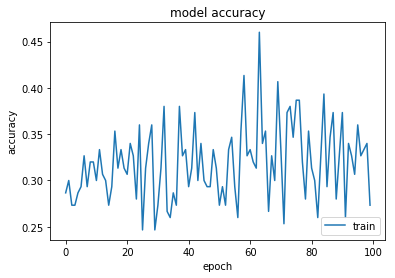

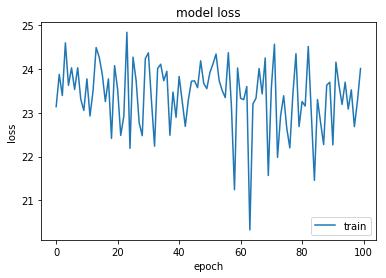

In [64]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

Epoch 1/100
150/150 [==============================] - 1s 10ms/step - loss: 1.0457 - acc: 0.4467
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 0.5515 - acc: 0.7267
Epoch 3/100
150/150 [==============================] - 0s 3ms/step - loss: 0.3869 - acc: 0.8733
Epoch 4/100
150/150 [==============================] - 1s 3ms/step - loss: 0.3212 - acc: 0.8800
Epoch 5/100
150/150 [==============================] - 0s 3ms/step - loss: 0.2335 - acc: 0.9533
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.1809 - acc: 0.9533
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.1503 - acc: 0.9400
Epoch 8/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1283 - acc: 0.9733
Epoch 9/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1177 - acc: 0.9667
Epoch 10/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1103 - acc: 0.9667
Epoch 11/100
150/150 [================

150/150 [==============================] - 0s 3ms/step - loss: 0.0471 - acc: 0.9867
Epoch 70/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0570 - acc: 0.9800
Epoch 71/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0481 - acc: 0.9733
Epoch 72/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0544 - acc: 0.9867
Epoch 73/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0489 - acc: 0.9800
Epoch 74/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0502 - acc: 0.9800
Epoch 75/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0577 - acc: 0.9733
Epoch 76/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0530 - acc: 0.9800
Epoch 77/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0505 - acc: 0.9733
Epoch 78/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0581 - acc: 0.9800
Epoch 79/100
150/150 [=====================

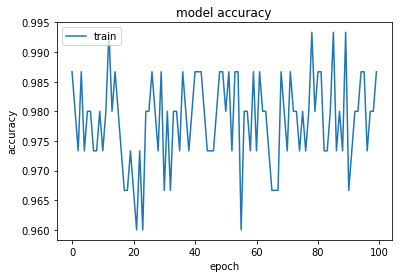

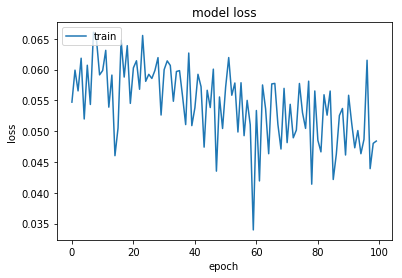

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)



from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

#C
history = model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

# Los datos que estan en el history 
print(history.history.keys())

# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()


<a id="tercero"></a>
### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.


> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

In [66]:
#Se hace un forward y una backward, se obtiene dE/dw, se hace guarda el L original, sobre los mismos pesos pero con uno alterado
#se tiene que hacer un forward para tener L(w+e) y verificar el limite

m_pesos_originales=[]

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_ejemplo=X_train[0]

#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
Y_ejemplo=y_onehot[0]


arquitectura=size_layers(3,4,32,16,3)
dw_v=[]
lim_v=[]
for i in range(100):
    modelo=NN_2ocultas(3, arquitectura)
    m_pesos_originales = modelo.m_pesos.copy()
    error,acc=modelo.training(X_ejemplo,Y_ejemplo,1,"ce", "sigmoid", 0.1,"grad",0)
    DE_Dw00 = modelo.e_m_pesos[0][0][0]
    dw_v.append(DE_Dw00)
    
    m_pesos_originales[0][0][0]+=epsilon 
    modelo2=NN_2ocultas(3, arquitectura)
    modelo2.m_pesos= m_pesos_originales.copy()
    error2,acc2=modelo2.training(X_ejemplo,Y_ejemplo,1,"ce", "sigmoid", 0.1,"grad",0)
    limite = (error2-error)/epsilon
    lim_v.append(limite)

print("dE/dw_v = ",dw_v)
print("limite = ",lim_v)


ypred [ 0.31664712  0.35678381  0.32656907]
ytrain [ 1.  0.  0.]
ypred [ 0.31664712  0.35678381  0.32656907]
ytrain [ 1.  0.  0.]
ypred [ 0.35732497  0.28437966  0.35829537]
ytrain [ 1.  0.  0.]
ypred [ 0.35732497  0.28437966  0.35829537]
ytrain [ 1.  0.  0.]
ypred [ 0.34411426  0.3406768   0.31520895]
ytrain [ 1.  0.  0.]
ypred [ 0.34411426  0.3406768   0.31520895]
ytrain [ 1.  0.  0.]
ypred [ 0.36823185  0.32320043  0.30856771]
ytrain [ 1.  0.  0.]
ypred [ 0.36823185  0.32320043  0.30856771]
ytrain [ 1.  0.  0.]
ypred [ 0.33454369  0.27538052  0.39007578]
ytrain [ 1.  0.  0.]
ypred [ 0.33454369  0.27538052  0.39007578]
ytrain [ 1.  0.  0.]
ypred [ 0.33476438  0.3524573   0.31277831]
ytrain [ 1.  0.  0.]
ypred [ 0.33476438  0.3524573   0.31277831]
ytrain [ 1.  0.  0.]
ypred [ 0.37219907  0.27911195  0.34868898]
ytrain [ 1.  0.  0.]
ypred [ 0.37219907  0.27911195  0.34868898]
ytrain [ 1.  0.  0.]
ypred [ 0.37603967  0.31015307  0.31380726]
ytrain [ 1.  0.  0.]
ypred [ 0.37603967  0.310

ypred [ 0.34726846  0.33873451  0.31399703]
ytrain [ 1.  0.  0.]
ypred [ 0.34204271  0.32949688  0.32846042]
ytrain [ 1.  0.  0.]
ypred [ 0.34204271  0.32949688  0.32846042]
ytrain [ 1.  0.  0.]
ypred [ 0.33490154  0.30339154  0.36170692]
ytrain [ 1.  0.  0.]
ypred [ 0.33490154  0.30339154  0.36170692]
ytrain [ 1.  0.  0.]
ypred [ 0.3491836   0.28487146  0.36594494]
ytrain [ 1.  0.  0.]
ypred [ 0.3491836   0.28487146  0.36594494]
ytrain [ 1.  0.  0.]
ypred [ 0.3150271   0.32426142  0.36071148]
ytrain [ 1.  0.  0.]
ypred [ 0.3150271   0.32426142  0.36071148]
ytrain [ 1.  0.  0.]
ypred [ 0.36575425  0.29055801  0.34368774]
ytrain [ 1.  0.  0.]
ypred [ 0.36575425  0.29055801  0.34368774]
ytrain [ 1.  0.  0.]
ypred [ 0.27435036  0.36902177  0.35662787]
ytrain [ 1.  0.  0.]
ypred [ 0.27435036  0.36902177  0.35662787]
ytrain [ 1.  0.  0.]
ypred [ 0.32695779  0.34255179  0.33049042]
ytrain [ 1.  0.  0.]
ypred [ 0.32695779  0.34255179  0.33049042]
ytrain [ 1.  0.  0.]
ypred [ 0.30764076  0.307

<a id="cuarto"></a>
### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

In [ ]:
def backwarding_momentum_reinit(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos):
    #inicializacion de momentum
    momentum_init=np.zeros(vector_arquit[-1])
    if tipo_error=="mse":
        error_EA=d_error_mse(vector_y,salida_l[-2])
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])  
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA[neurona_final]*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()
        #correccion vector de pesos-matriz final correspondiente a la neurona
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()-(tasa*error_EW_n)

        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()
    e_salida_l[total_capas-1]=error_EA.copy() #es el triangulo (Delta mayus.)        
    #backwarding de capas ocultas y capa input
    #corrección de pesos que debiese ser por batch         
    for capa in np.arange(total_capas-2,-1,-1): #se mueve en capa 1 y 0
        error_EA_s=np.sum(e_salida_l[capa+1]) #suma el vector EA calculado en la capa 2 (igual para todos)
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() #se hace (16x32 la matriz)
        for neurona in range(vector_arquit[capa+1]):
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            #corregir pesos
            
            arreglo=(pesos_auxiliar2[neurona]-(tasa*error_EW_s)).copy() #(vector de 32)
            pesos_auxiliar2[neurona]=arreglo.copy()  #se hace
            m_pesos[capa]=(pesos_auxiliar2.T).copy()  
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

In [ ]:
def backwarding_momentum(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos):
    if tipo_error=="mse":
        error_EA=d_error_mse(vector_y,salida_l[-2])
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])  
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA[neurona_final]*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()
        #correccion vector de pesos-matriz final correspondiente a la neurona
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()-(tasa*error_EW_n)

        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()
    e_salida_l[total_capas-1]=error_EA.copy() #es el triangulo (Delta mayus.)        
    #backwarding de capas ocultas y capa input
    #corrección de pesos que debiese ser por batch         
    for capa in np.arange(total_capas-2,-1,-1): #se mueve en capa 1 y 0
        error_EA_s=np.sum(e_salida_l[capa+1]) #suma el vector EA calculado en la capa 2 (igual para todos)
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() #se hace (16x32 la matriz)
        for neurona in range(vector_arquit[capa+1]):
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            #corregir pesos
            
            arreglo=(pesos_auxiliar2[neurona]-(tasa*error_EW_s)).copy() #(vector de 32)
            pesos_auxiliar2[neurona]=arreglo.copy()  #se hace
            m_pesos[capa]=(pesos_auxiliar2.T).copy()  
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos